In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# 讀取資料
match_df = pd.read_csv('merged_match_data - 複製.csv')

# 處理目標變數
match_df['blue_win'] = match_df['blue_win'].astype(str).str.upper().map({'TRUE': 1, 'FALSE': 0})
match_df = match_df[match_df['blue_win'].isin([0, 1])]

# 選擇資源特徵（排除角色與文字）
feature_cols = [
    col for col in match_df.columns
    if 'championId' not in col and 'position' not in col
    and 'TeamChampions' not in col and col != 'blue_win'
]

# 過濾出數值欄位
numeric_cols = match_df[feature_cols].select_dtypes(include=['int64', 'float64']).columns.tolist()

# 建立資料集
X = match_df[numeric_cols].fillna(0)
y = match_df['blue_win']

# 切分訓練與測試資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立隨機森林模型
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 預測與評估
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# 評估指標
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


<ipython-input-4-7005a1d9a97c>:7: DtypeWarning: Columns (1,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  match_df = pd.read_csv('merged_match_data - 複製.csv')


Test Accuracy: 0.9878108239882983
F1 Score: 0.988168480832939
ROC AUC: 0.9992514214901519


<ipython-input-16-d99ca1665edb>:9: DtypeWarning: Columns (1,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  match_df = pd.read_csv('merged_match_data - 複製.csv')


Test Accuracy: 0.9858605558264262
F1 Score: 0.9862363550071191
ROC AUC: 0.9990072887657069
Cross-Validation Accuracy: 0.9841040301578051


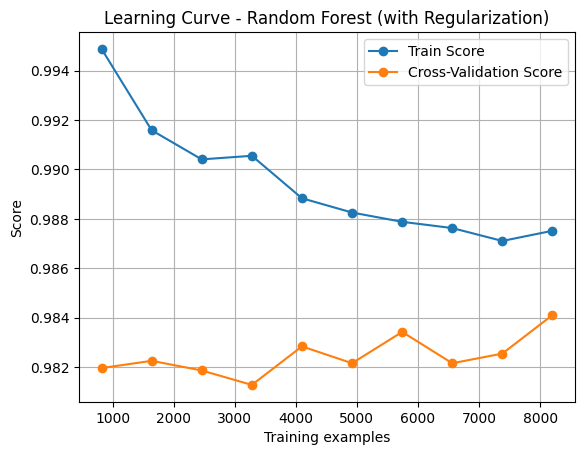

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# 讀取資料
match_df = pd.read_csv('merged_match_data - 複製.csv')

# 處理目標變數
match_df['blue_win'] = match_df['blue_win'].astype(str).str.upper().map({'TRUE': 1, 'FALSE': 0})
match_df = match_df[match_df['blue_win'].isin([0, 1])]

# 選擇資源特徵（排除角色與文字）
feature_cols = [
    col for col in match_df.columns
    if 'championId' not in col and 'position' not in col
    and 'TeamChampions' not in col and col != 'blue_win'
]

# 過濾出數值欄位
numeric_cols = match_df[feature_cols].select_dtypes(include=['int64', 'float64']).columns.tolist()

# 建立資料集
X = match_df[numeric_cols].fillna(0)
y = match_df['blue_win']

# 切分訓練與測試資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立並訓練隨機森林模型（加入正則化）
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    max_leaf_nodes=30,
    random_state=42
)
clf.fit(X_train, y_train)

# 預測與評估
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# 全資料進行交叉驗證
cv_scores = cross_val_score(clf, X, y, cv=5)
print("Cross-Validation Accuracy:", cv_scores.mean())

# 繪製學習曲線
train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label="Train Score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-Validation Score")
plt.title("Learning Curve - Random Forest (with Regularization)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# 驗證集評估
y_val_pred = model.predict(X_val)
y_val_prob = model.predict_proba(X_val)[:, 1]
print("=== 驗證集表現 ===")
print("Val Accuracy:", accuracy_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))
print("ROC AUC:", roc_auc_score(y_val, y_val_prob))
print("正類（1）預測比例：", sum(y_val_pred) / len(y_val_pred))



=== 驗證集表現 ===
Val Accuracy: 0.9863459037711313
F1 Score: 0.9865642994241842
ROC AUC: 0.9991695419795684
正類（1）預測比例： 0.5091027308192457


In [ ]:
print(X.columns.tolist())


['blueChampionKill', 'blueTowerKill', 'blueInhibitorKill', 'blueBaronKill', 'blueRiftHeraldKill', 'blueTotalGold', 'blueMinionsKilled', 'blueJungleMinionsKilled', 'blueAvgPlayerLevel', 'redChampionKill', 'redTowerKill', 'redInhibitorKill', 'redBaronKill', 'redRiftHeraldKill', 'redTotalGold', 'redMinionsKilled', 'redJungleMinionsKilled', 'redAvgPlayerLevel', 'blueDragonKill', 'blueDragonHextechKill', 'blueDragonChemtechKill', 'blueDragonFireKill', 'blueDragonAirKill', 'blueDragonEarthKill', 'blueDragonWaterKill', 'blueDragonElderKill', 'blueVoidgrubKill', 'blueAtakhanKill', 'redDragonKill', 'redDragonHextechKill', 'redDragonChemtechKill', 'redDragonFireKill', 'redDragonAirKill', 'redDragonEarthKill', 'redDragonWaterKill', 'redDragonElderKill', 'redVoidgrubKill', 'redAtakhanKill', 'redDragonChemtech_DragonKill', 'redDragonEarth_DragonKill', 'blueDragonHextech_DragonKill', 'redDragonHextech_DragonKill', 'redDragonWater_DragonKill', 'blueDragonFire_DragonKill', 'blueDragonChemtech_DragonKi

玩家體驗

In [ ]:
import pandas as pd
import joblib
import os
import sklearn

# Check library versions (optional, but good for debugging)
print(f"Joblib version: {joblib.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")

# Define the path to the models directory
model_dir = "models"
model_path = os.path.join(model_dir, "rf_model.pkl")
columns_path = os.path.join(model_dir, "rf_columns.txt")


# 載入模型與欄位
# Ensure the model and columns file paths are correct
model = joblib.load(model_path)
with open(columns_path, "r") as f:
    columns = [line.strip() for line in f.readlines()]

# 欄位說明（可根據需要擴充）
descriptions = {
    "blueChampionKill": "藍隊擊殺數",
    "blueFirstBlood": "藍隊是否拿到首殺（0 或 1）",
    "blueTowerKill": "藍隊摧毀塔數",
    "blueTotalGold": "藍隊總金錢",
    "blueAvgPlayerLevel": "藍隊平均等級",
    "redChampionKill": "紅隊擊殺數",
    "redFirstBlood": "紅隊是否拿到首殺（0 或 1）",
    "redTowerKill": "紅隊摧毀塔數",
    "redTotalGold": "紅隊總金錢",
    "redAvgPlayerLevel": "紅隊平均等級"
}

print("🧠 英雄聯盟比賽勝率預測系統")
print("🔽 請依照下列提示逐一輸入比賽資源特徵：")

while True:
    values = []
    print("\n👉 開始輸入一場比賽資訊（輸入空白直接結束）：")
    for col in columns:
        desc = descriptions.get(col, "請輸入數值")
        while True:
            val = input(f"{col}（{desc}）：")
            if val.strip() == "":
                print("⛔️ 輸入中止。")
                exit()
            try:
                values.append(float(val))
                break
            except:
                print("⚠️ 請輸入正確數值！")

    df = pd.DataFrame([values], columns=columns)
    prob = model.predict_proba(df)[0][1]
    print(f"🔍 藍隊勝率預測：{prob:.2%}")
    print("→ 判斷結果：", "藍隊優勢 ✅" if prob >= 0.5 else "紅隊優勢 ❗")

Joblib version: 1.5.0
Scikit-learn version: 1.6.1
🧠 英雄聯盟比賽勝率預測系統
🔽 請依照下列提示逐一輸入比賽資源特徵：

👉 開始輸入一場比賽資訊（輸入空白直接結束）：


KeyboardInterrupt: Interrupted by user

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 讀取資料
df = pd.read_csv("/content/merged_match_data - 複製.csv")  # 修改為你上傳的檔名
df = df.dropna(subset=["blue_win"])
df['blue_win'] = df['blue_win'].astype(str).str.upper().map({
    'TRUE': 1, 'FALSE': 0, '0': 0, '1': 1
}).astype(int)

# 選取特徵欄位
exclude_columns = ['match_id', 'blue_win', 'blueTeamChampions', 'redTeamChampions']
feature_columns = [col for col in df.columns if col not in exclude_columns and df[col].dtype in [int, float]]
X = df[feature_columns].fillna(0)
y = df['blue_win']

# 分割訓練與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ===== Naive Bayes =====
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

print("📘 Naive Bayes")
print("Train Accuracy:", accuracy_score(y_train, nb_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, nb_model.predict(X_test)))
print("Cross-Validation Accuracy:", cross_val_score(nb_model, X, y, cv=5).mean())
print(classification_report(y_test, nb_model.predict(X_test)))

### ===== Logistic Regression =====
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train, y_train)

print("\n📙 Logistic Regression")
print("Train Accuracy:", accuracy_score(y_train, lr_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, lr_model.predict(X_test)))
print("Cross-Validation Accuracy:", cross_val_score(lr_model, X, y, cv=5).mean())
print(classification_report(y_test, lr_model.predict(X_test)))


<ipython-input-9-c5036ff9bf81>:8: DtypeWarning: Columns (1,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/merged_match_data - 複製.csv")  # 修改為你上傳的檔名


📘 Naive Bayes
Train Accuracy: 0.9795967644573222
Test Accuracy: 0.9792370835345244
Cross-Validation Accuracy: 0.9792356839446044
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       994
           1       0.98      0.98      0.98      1077

    accuracy                           0.98      2071
   macro avg       0.98      0.98      0.98      2071
weighted avg       0.98      0.98      0.98      2071



KeyboardInterrupt: 

In [ ]:
import os

# 確保 models 資料夾存在
if not os.path.exists('models'):
    os.makedirs('models')

# 儲存欄位名稱
with open("models/rf_columns.txt", "w") as f:
    for col in numeric_cols:
        f.write(f"{col}\n")

print("✅ 已儲存欄位名稱到 models/rf_columns.txt")

✅ 已儲存欄位名稱到 models/rf_columns.txt
